# Stroke Risk Prediction Model


## Tentang Dataset

Dataset yang digunakan ini dikonstruksi berdasarkan literatur medis, konsultasi dengan pakar, dan pemodelan statistik. Distribusi dan hubungan antar fitur terinspirasi dari pengamatan klinis dunia nyata, memastikan validitas medis.

### Referensi Medis & Sumber

Struktur dataset ini didasarkan pada faktor risiko yang telah ditetapkan dan didokumentasikan dalam buku teks medis terkemuka, publikasi ilmiah, serta pedoman dari organisasi kesehatan. Referensi utama meliputi:

* American Stroke Association (ASA): Guidelines on stroke risk factors and early warning symptoms.
* Mayo Clinic & Cleveland Clinic: Medical literature on cardiovascular diseases and stroke risk factors.
* *Harrison’s Principles of Internal Medicine* (20th Edition): In-depth insights into stroke etiology and risk factors.
* *Stroke Prevention, Treatment, and Rehabilitation* (2021, Oxford University Press): Comprehensive guide on stroke mechanisms and preventive strategies.
* *The Stroke Book* (Cambridge Medicine, 2nd Edition): Clinical insights into the symptoms and early predictors of stroke.
* World Health Organization (WHO) Reports on Stroke Risk and Prevention.

### Dataset Fitur

| Column Name                    | Description                                                                 |
| ------------------------------ | --------------------------------------------------------------------------- |
| Chest Pain                     | Binary (0/1): Indicates chest pain symptom.                                 |
| Shortness of Breath            | Binary (0/1): Difficulty breathing indicator.                               |
| Irregular Heartbeat            | Binary (0/1): Irregular heartbeat presence.                                 |
| Fatigue & Weakness             | Binary (0/1): Persistent fatigue or weakness.                               |
| Dizziness                      | Binary (0/1): Reports frequent dizziness.                                   |
| Swelling (Edema)               | Binary (0/1): Swelling due to fluid retention.                              |
| Pain in Neck/Jaw/Shoulder/Back | Binary (0/1): Pain in these areas indicating possible cardiac/stroke signs. |
| Excessive Sweating             | Binary (0/1): Unusual sweating reported.                                    |
| Persistent Cough               | Binary (0/1): Chronic cough presence.                                       |
| Nausea/Vomiting                | Binary (0/1): Frequent nausea or vomiting.                                  |
| High Blood Pressure            | Binary (0/1): Hypertension indicator.                                       |
| Chest Discomfort (Activity)    | Binary (0/1): Chest discomfort during activity.                             |
| Cold Hands/Feet                | Binary (0/1): Frequent cold extremities.                                    |
| Snoring/Sleep Apnea            | Binary (0/1): Reports sleep apnea.                                          |
| Anxiety/Feeling of Doom        | Binary (0/1): Experiences anxiety or sense of doom.                         |
| Stroke Risk (%)                | Continuous (0-100): Estimated stroke risk percentage.                       |
| At Risk (Binary)               | Binary (0/1): Classified at risk (1) or not (0).                            |
| Age                            | Integer: Age of the individual.                                             |

**Link Dataset**: [Kaggle - Stroke Risk Prediction Dataset](https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset)


## Import Libraries And Load Dataset

In [42]:
from google.colab import drive
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/stroke_ml_terapan/stroke_risk_dataset.csv')

Mounted at /content/drive


menggunakan drive.mount dan library pandas untuk load dataset
* drive.mount() untuk mengakses file di Google Drive dari Google Colab.
* pd.read_csv() membaca dataset CSV dari folder yang sudah ditentukan

## Exploratory Data Analysis (EDA)

In [ ]:
data.shape

(70000, 18)

* data.shape untuk mengetahui jumlah dataset,
jumlah dataset yang digunakan di model ini adalah **70.000** data dan **18** kolom

In [ ]:
data.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


* melihat 5 data pertama di dataset dengan data.head

In [ ]:
data.tail()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,18,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,24,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,49,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,45,48.5,0
69999,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,74,63.0,1


* melihat 5 data terakhir di dataset dengan data.tail

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

* data.info digunakan untuk melihat tipe data dan jumlah non null dataset dengan hasil yaitu semua kolom di dataset ini non null dan bertipe data integer kecuali Stroke Risk % yang memiliki tipe data float

In [ ]:
data.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


* mencari tau informasi statistik dataset menggunakan .describe lalu mendapatkan hasil yaitu hampir semua kolom isi datanya adalah biner selain kolom age dan store risk % yang merupakan kolom numerikal

In [ ]:
data.isna().sum()

,0
Chest Pain,0
Shortness of Breath,0
Irregular Heartbeat,0
Fatigue & Weakness,0
Dizziness,0
Swelling (Edema),0
Pain in Neck/Jaw/Shoulder/Back,0
Excessive Sweating,0
Persistent Cough,0
Nausea/Vomiting,0


* mencari tau missing value dengan .isna dan hasilnya, tidak ditemukan missing value di seluruh kolom dataset. Data **lengkap 100%**.

In [ ]:
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"Jumlah outlier di {col}: {len(outliers)}")

Jumlah outlier di Chest Pain: 0
Jumlah outlier di Shortness of Breath: 0
Jumlah outlier di Irregular Heartbeat: 0
Jumlah outlier di Fatigue & Weakness: 0
Jumlah outlier di Dizziness: 0
Jumlah outlier di Swelling (Edema): 0
Jumlah outlier di Pain in Neck/Jaw/Shoulder/Back: 0
Jumlah outlier di Excessive Sweating: 0
Jumlah outlier di Persistent Cough: 0
Jumlah outlier di Nausea/Vomiting: 0
Jumlah outlier di High Blood Pressure: 0
Jumlah outlier di Chest Discomfort (Activity): 0
Jumlah outlier di Cold Hands/Feet: 0
Jumlah outlier di Snoring/Sleep Apnea: 0
Jumlah outlier di Anxiety/Feeling of Doom: 0
Jumlah outlier di Age: 0
Jumlah outlier di Stroke Risk (%): 72
Jumlah outlier di At Risk (Binary): 0


Cek Outlier dengan metode IQR (interquartile range):
- Outlier terdeteksi pada kolom **Stroke Risk (%)**
- Tidak ada outlier di kolom lain

In [ ]:
skewness_values = data.skew()
print("Skewness per Kolom:\n", skewness_values)

Skewness per Kolom:
 Chest Pain                       -0.007486
Shortness of Breath               0.014115
Irregular Heartbeat               0.004457
Fatigue & Weakness               -0.000400
Dizziness                        -0.012172
Swelling (Edema)                 -0.002229
Pain in Neck/Jaw/Shoulder/Back    0.003257
Excessive Sweating               -0.014686
Persistent Cough                 -0.003200
Nausea/Vomiting                  -0.007772
High Blood Pressure              -0.002571
Chest Discomfort (Activity)       0.001771
Cold Hands/Feet                   0.004514
Snoring/Sleep Apnea              -0.002743
Anxiety/Feeling of Doom           0.000514
Age                              -0.000446
Stroke Risk (%)                  -0.013033
At Risk (Binary)                 -0.625301
dtype: float64


* Mencari tau Skewness, hampir semua kolom memiliki skewness mendekati 0 yang berarti **distribusi simetris atau normal**.

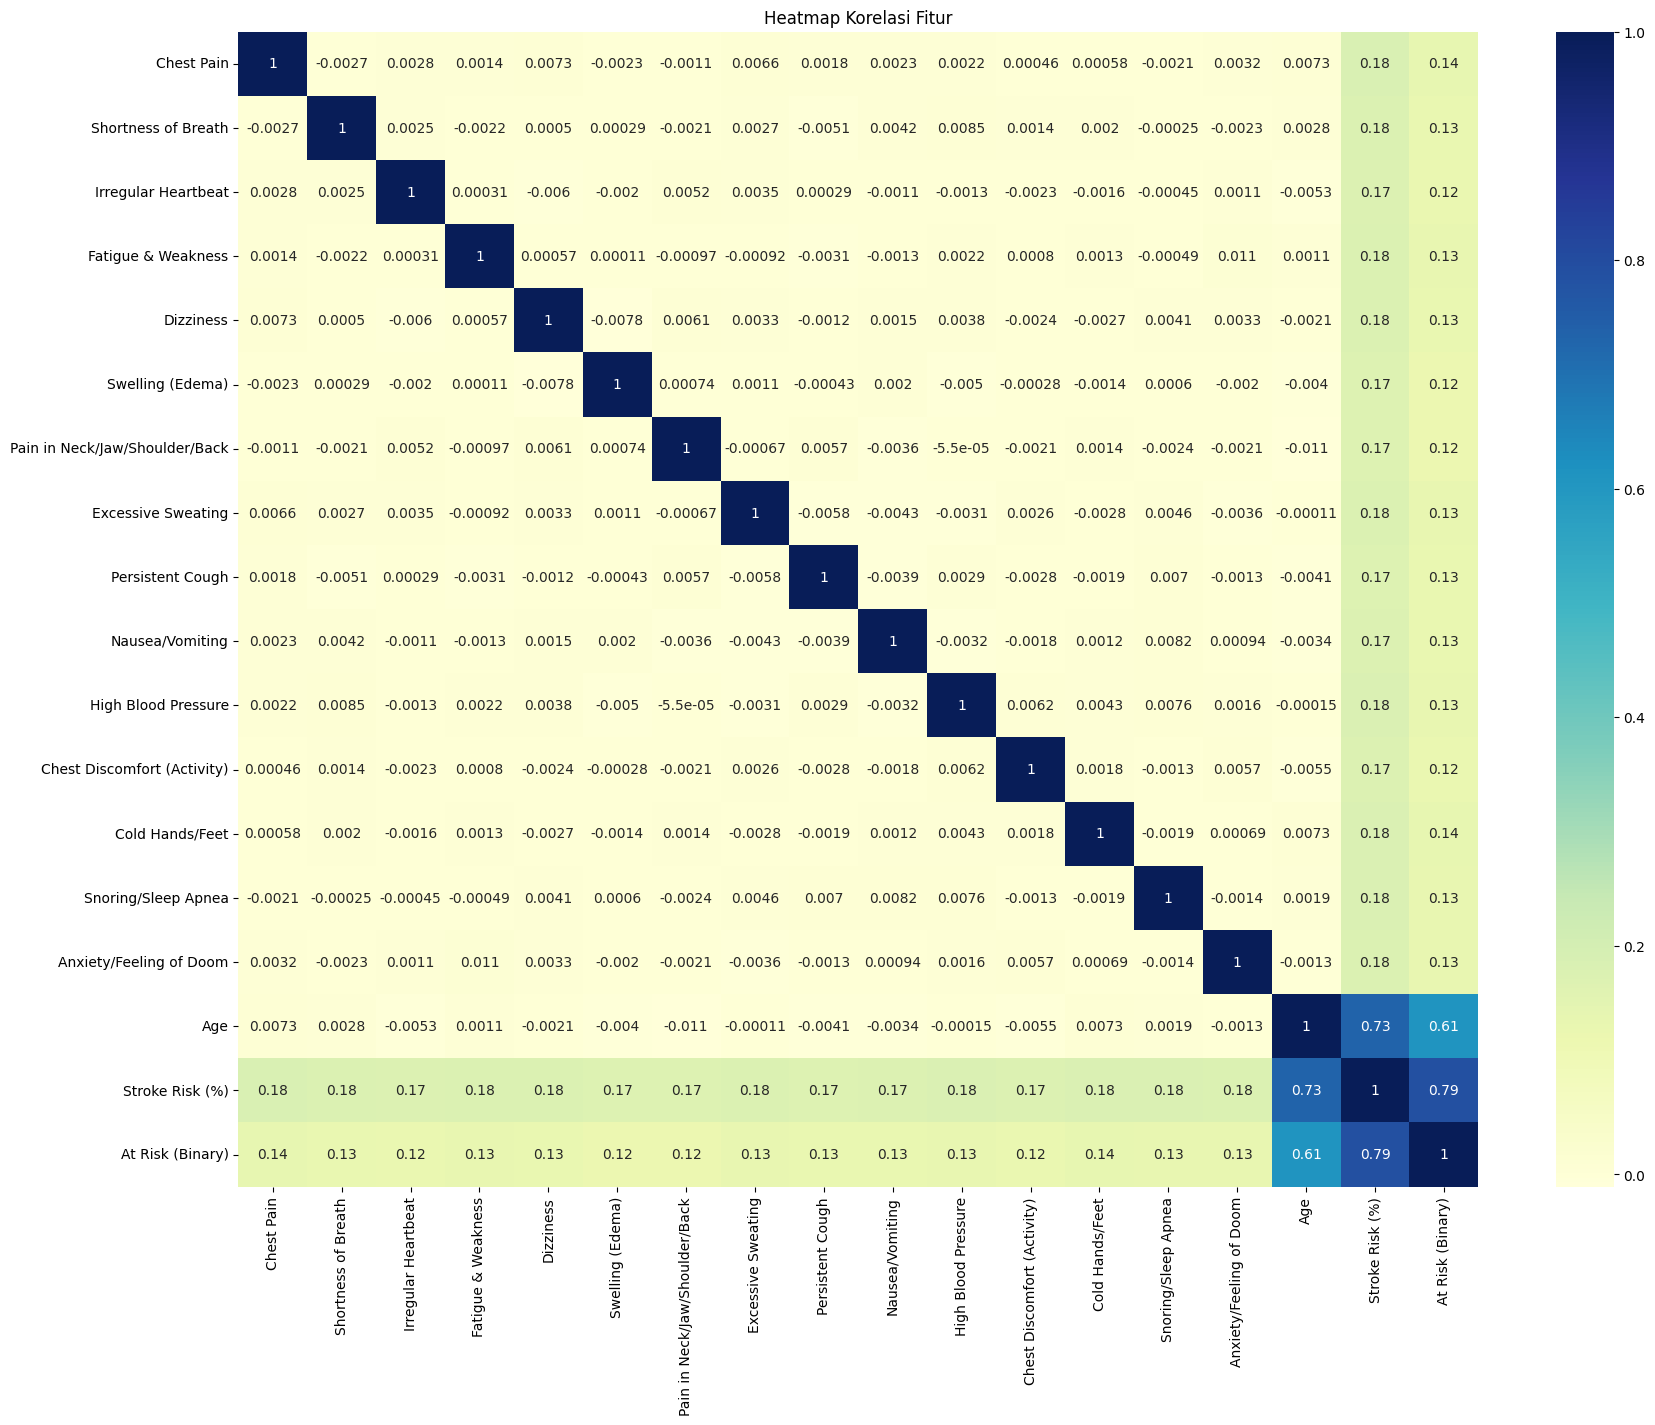

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title('Heatmap Korelasi Fitur')
plt.show()

Berdasarkan heatmap korelasi, diperoleh beberapa temuan penting mengenai hubungan antar fitur numerik pada dataset:

- Korelasi tertinggi terhadap variabel target **At Risk (Binary)** ditemukan pada:
    - **Stroke Risk (%)** dengan nilai korelasi 0,79.
    - **Age** dengan nilai korelasi 0,61.
- Korelasi antara variabel gejala dengan **At Risk (Binary)** relatif rendah, berkisar antara 0,12 hingga 0,14.
- Hubungan antar sesama variabel gejala juga lemah, dengan nilai korelasi mendekati nol.
- Korelasi antara **Stroke Risk (%)** dan **Age** cukup tinggi, yaitu sebesar 0,73, menunjukkan adanya kecenderungan peningkatan risiko stroke seiring bertambahnya usia.

Interpretasi:
- Variabel **Stroke Risk (%)** dan **Age** dapat dianggap sebagai prediktor utama dalam menentukan risiko stroke.
- Variabel gejala lainnya memiliki kontribusi yang lebih kecil secara individual terhadap status risiko stroke.



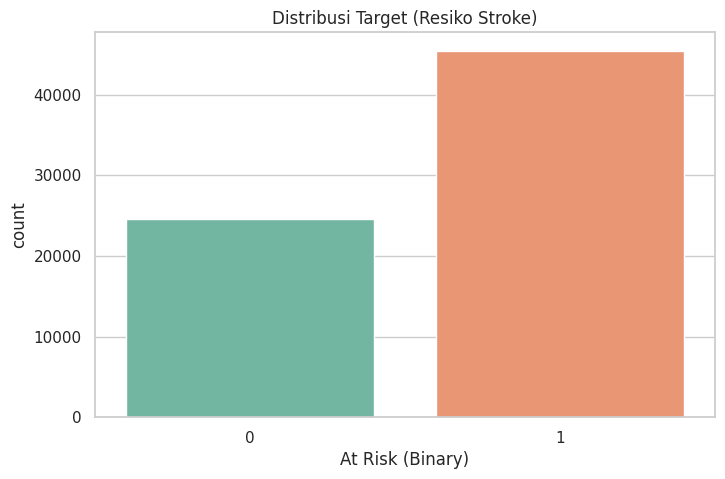

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='At Risk (Binary)', hue='At Risk (Binary)', palette='Set2', legend=False)
plt.title('Distribusi Target (Resiko Stroke)')
plt.show()

Visualisasi ini menunjukkan distribusi target variabel **At Risk (Binary)** dalam dataset.
- Jumlah individu yang **berisiko stroke (label 1)** lebih banyak dibandingkan yang tidak berisiko.
- Terdapat ketidakseimbangan kelas, di mana sekitar **65%** individu diklasifikasikan berisiko, sedangkan **35%** tidak berisiko.

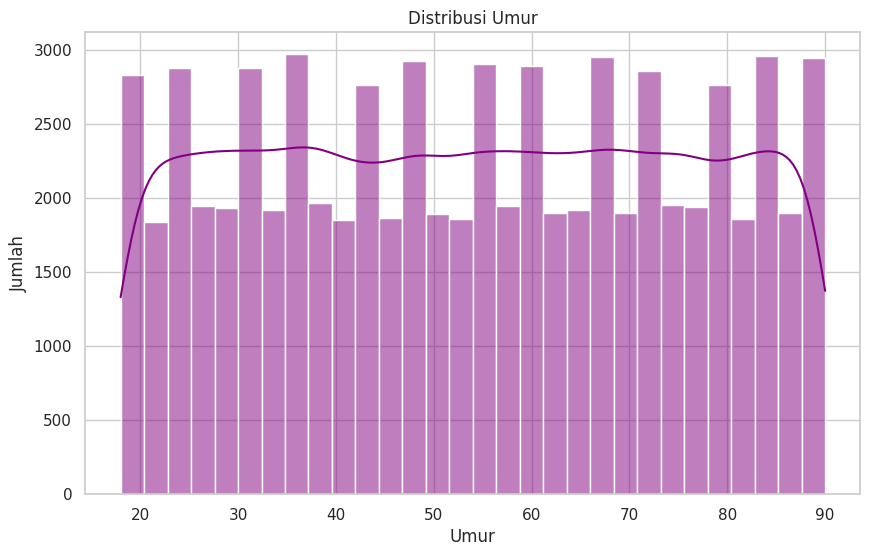

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True, color='purple')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

Plot ini digunakan untuk menampilkan distribusi usia dari seluruh individu dalam dataset
- Rentang usia peserta berada di antara **20 hingga 90 tahun**.
- Distribusi relatif **merata** di semua rentang usia, dengan sedikit penurunan di usia 18–20 dan 89–90.
- Garis KDE (kernel density estimation) memperlihatkan pola distribusi cenderung datar dengan sedikit peningkatan di kelompok usia 50–70 tahun.

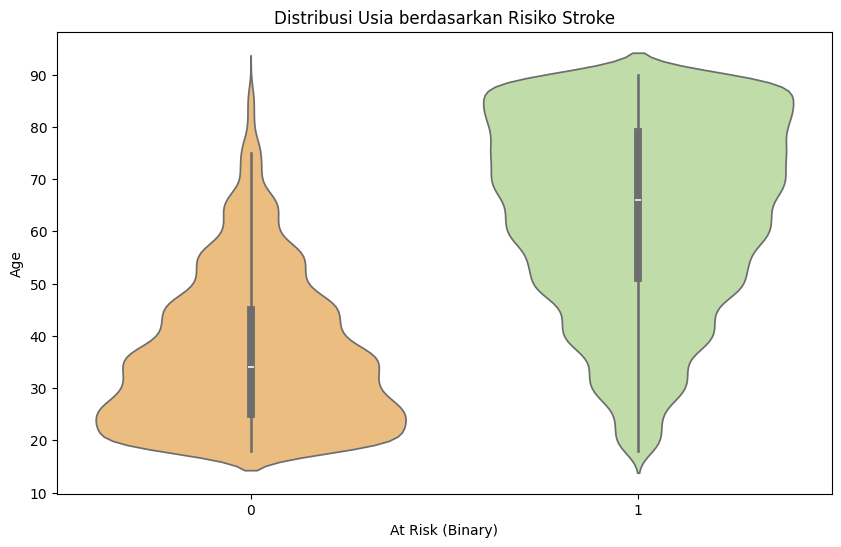

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x='At Risk (Binary)', y='Age', hue='At Risk (Binary)', palette='Spectral', legend=False)
plt.title('Distribusi Usia berdasarkan Risiko Stroke')
plt.show()

Violinplot ini membandingkan distribusi usia antara kelompok **berisiko stroke (1)** dan **tidak berisiko (0)**.
- Kelompok **tidak berisiko (0)** memiliki distribusi usia yang lebih rendah dengan median sekitar **35 tahun**.
- Kelompok **berisiko stroke (1)** memiliki distribusi usia lebih tinggi dengan median sekitar **65 tahun**.
- Kelompok berisiko juga menunjukkan persebaran yang lebih lebar hingga usia 90 tahun.

Interpretasi:
Usia merupakan faktor penting dalam risiko stroke, di mana individu yang lebih tua cenderung memiliki risiko lebih tinggi.

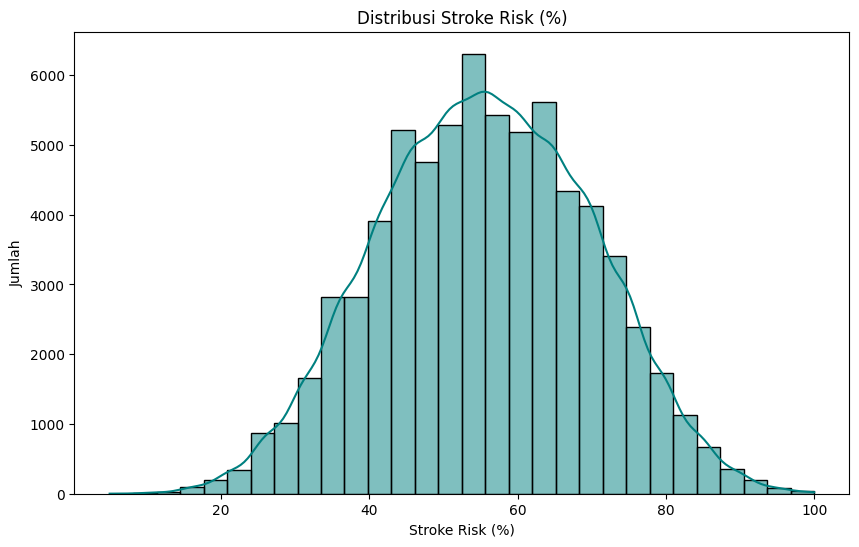

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Stroke Risk (%)'], bins=30, kde=True, color='teal')
plt.title('Distribusi Stroke Risk (%)')
plt.xlabel('Stroke Risk (%)')
plt.ylabel('Jumlah')
plt.show()

Histogram ini menunjukkan distribusi nilai **Stroke Risk (%)** di dalam dataset.

- Distribusi mendekati bentuk **normal (bell-shaped)** dengan puncak sekitar **55%**.
- Terdapat persebaran data dari risiko mendekati **0% hingga 100%**, dengan konsentrasi terbesar pada nilai **45%–65%**.
- Grafik menunjukkan penyebaran risiko stroke yang relatif merata, tanpa adanya dominasi nilai ekstrem.

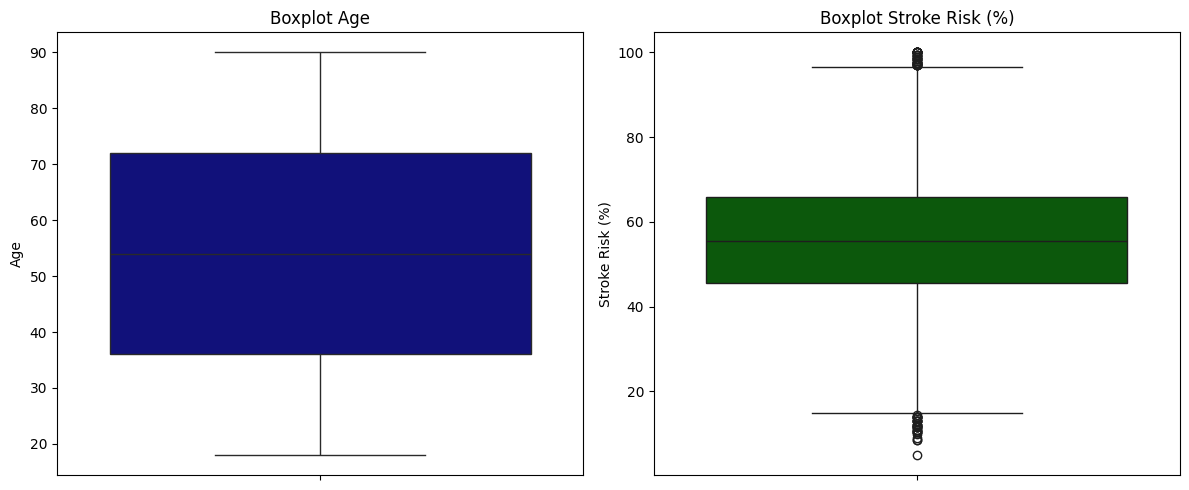

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['Age'], color='darkblue')
plt.title('Boxplot Age')

plt.subplot(1,2,2)
sns.boxplot(y=data['Stroke Risk (%)'], color='darkgreen')
plt.title('Boxplot Stroke Risk (%)')

plt.tight_layout()
plt.show()

Boxplot ini digunakan untuk melihat penyebaran data dan mendeteksi outlier pada **Age** dan **Stroke Risk (%)**.
- **Boxplot Age** menunjukkan penyebaran data dari **18 hingga 90 tahun** tanpa outlier signifikan.
- **Boxplot Stroke Risk (%)** menunjukkan adanya **outlier di atas nilai 95% dan di bawah 20%**.
- Median Age berada di sekitar **55 tahun**, sedangkan median Stroke Risk (%) berada di sekitar **55%**.

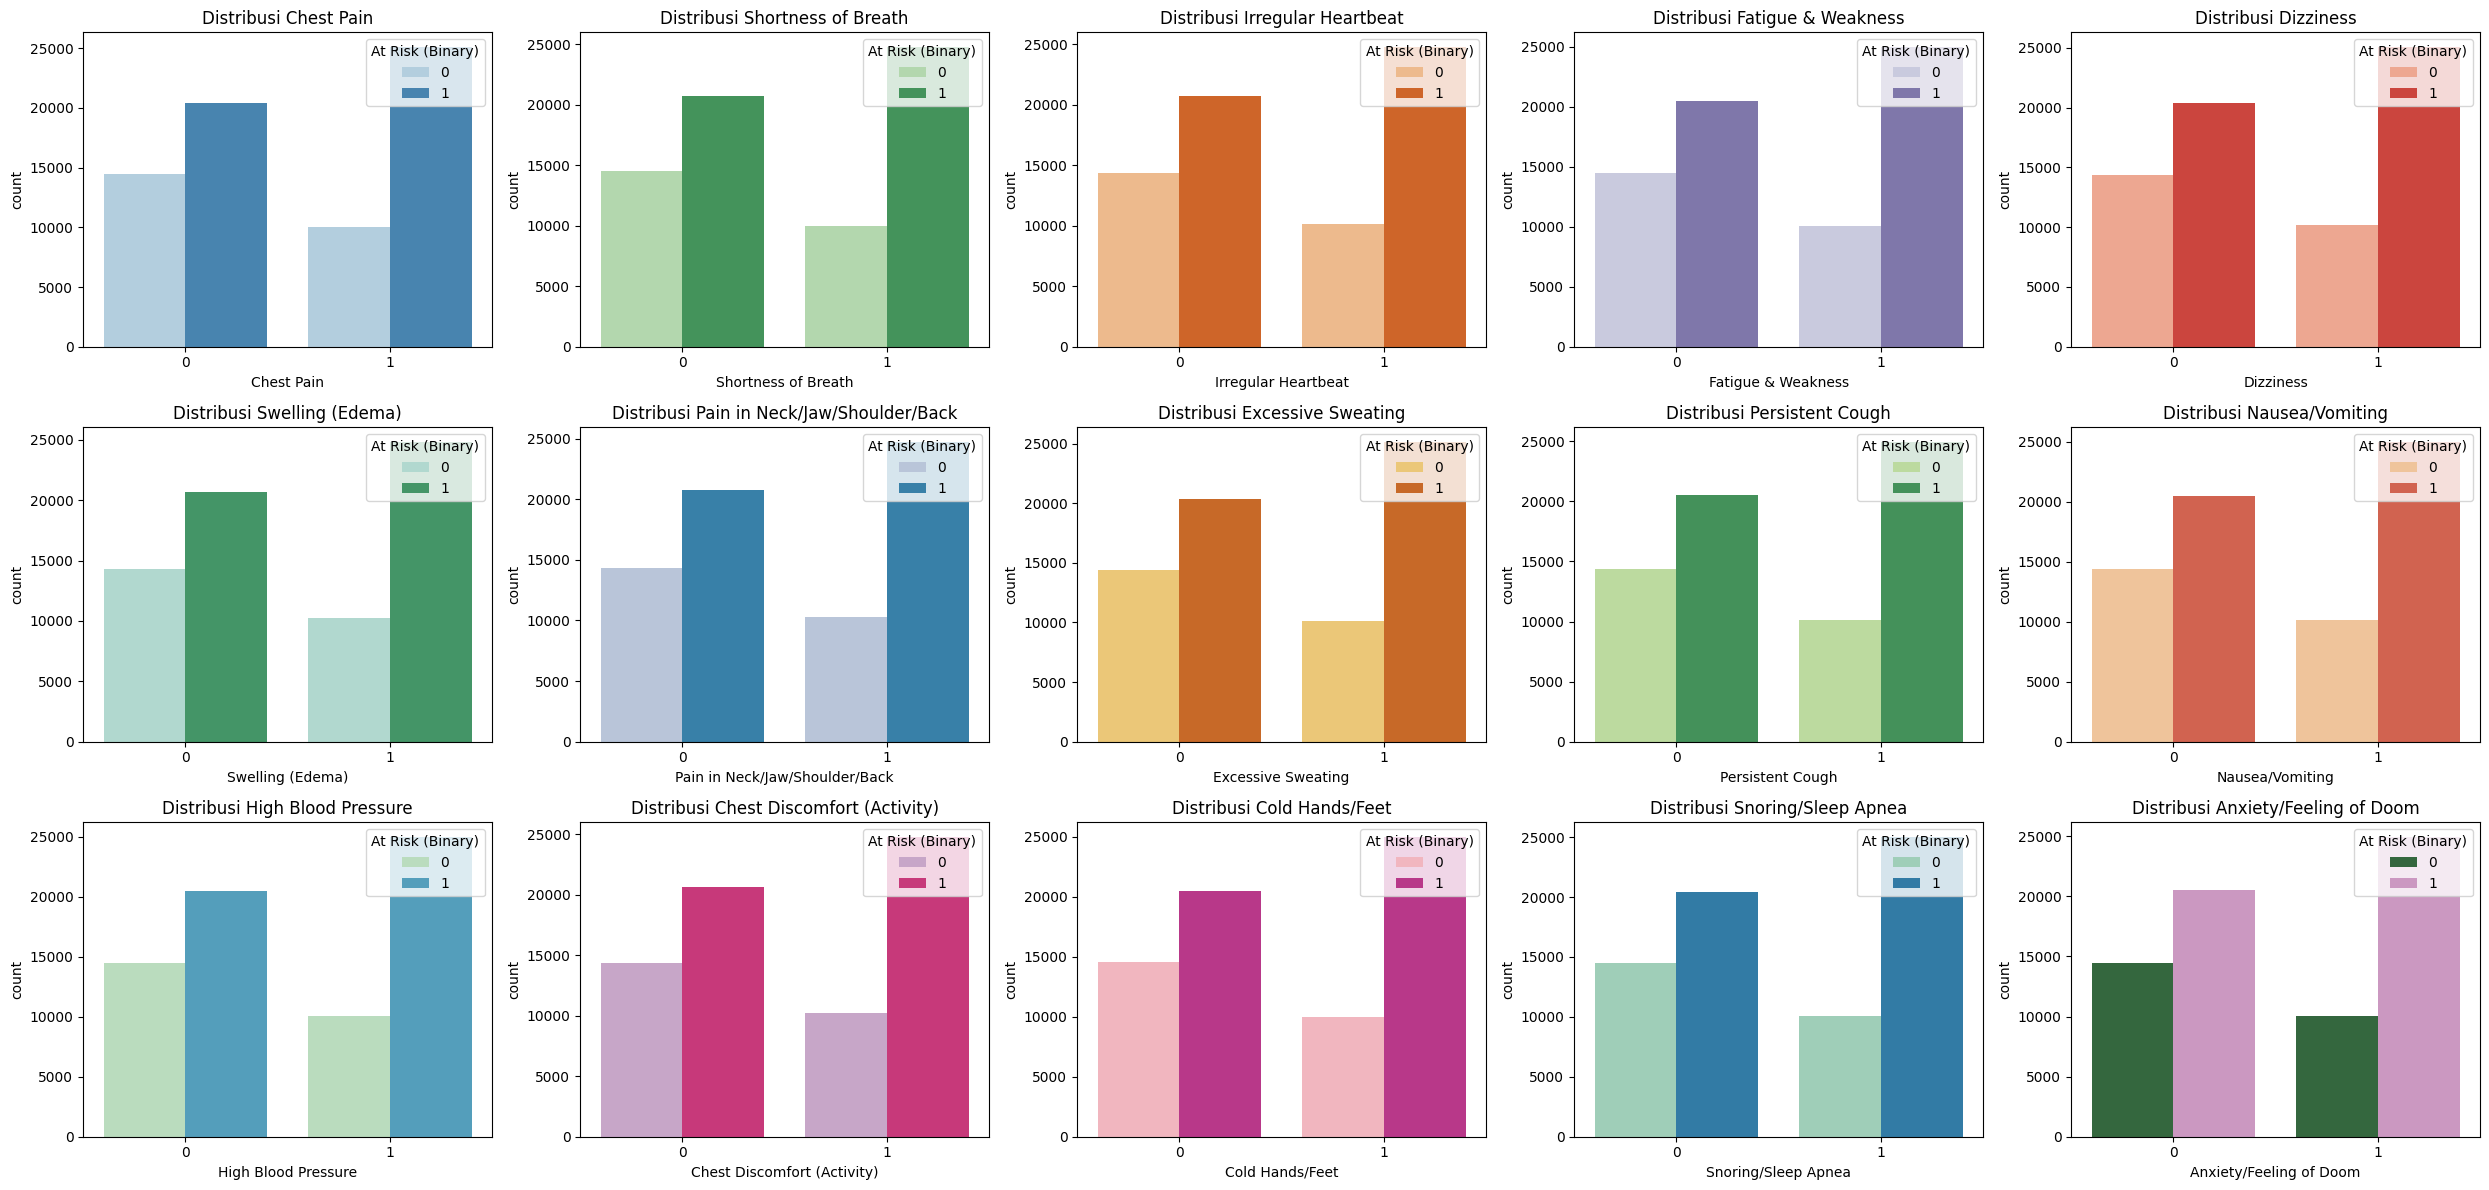

In [ ]:
gejala_cols = ['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat', 'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
               'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating', 'Persistent Cough', 'Nausea/Vomiting',
               'High Blood Pressure', 'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea', 'Anxiety/Feeling of Doom']

num_cols = len(gejala_cols)
fig, axes = plt.subplots(3, 5, figsize=(25, 12))

unique_palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds',
                   'BuGn', 'PuBu', 'YlOrBr', 'YlGn', 'OrRd',
                   'GnBu', 'PuRd', 'RdPu', 'YlGnBu', 'cubehelix']

for i, col in enumerate(gejala_cols):
    row = i // 5
    col_idx = i % 5
    if col in data.columns:
        sns.countplot(data=data, x=col, hue='At Risk (Binary)', palette=unique_palettes[i], ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

Visualisasi ini menampilkan distribusi frekuensi dari setiap gejala yang tercatat dalam dataset, dipisahkan berdasarkan kelompok **At Risk (Binary)**, yaitu individu yang berisiko stroke (1) dan tidak berisiko (0).
Hasil pengamatan menunjukkan pola umum sebagai berikut:
- Mayoritas gejala lebih sering terjadi pada kelompok **berisiko stroke (label 1)** dibandingkan kelompok tidak berisiko.
- Beberapa gejala dengan perbedaan distribusi yang cukup mencolok antara kelompok berisiko dan tidak berisiko meliputi:
    - **Chest Pain**: lebih banyak dilaporkan oleh kelompok berisiko.
    - **Irregular Heartbeat**: lebih banyak terjadi pada kelompok berisiko.
    - **High Blood Pressure**: menunjukkan peningkatan signifikan pada kelompok berisiko.
    - **Pain in Neck/Jaw/Shoulder/Back**: cenderung lebih tinggi pada kelompok berisiko.
- Gejala lainnya juga cenderung lebih banyak dialami oleh individu berisiko stroke, meskipun perbedaannya lebih kecil.

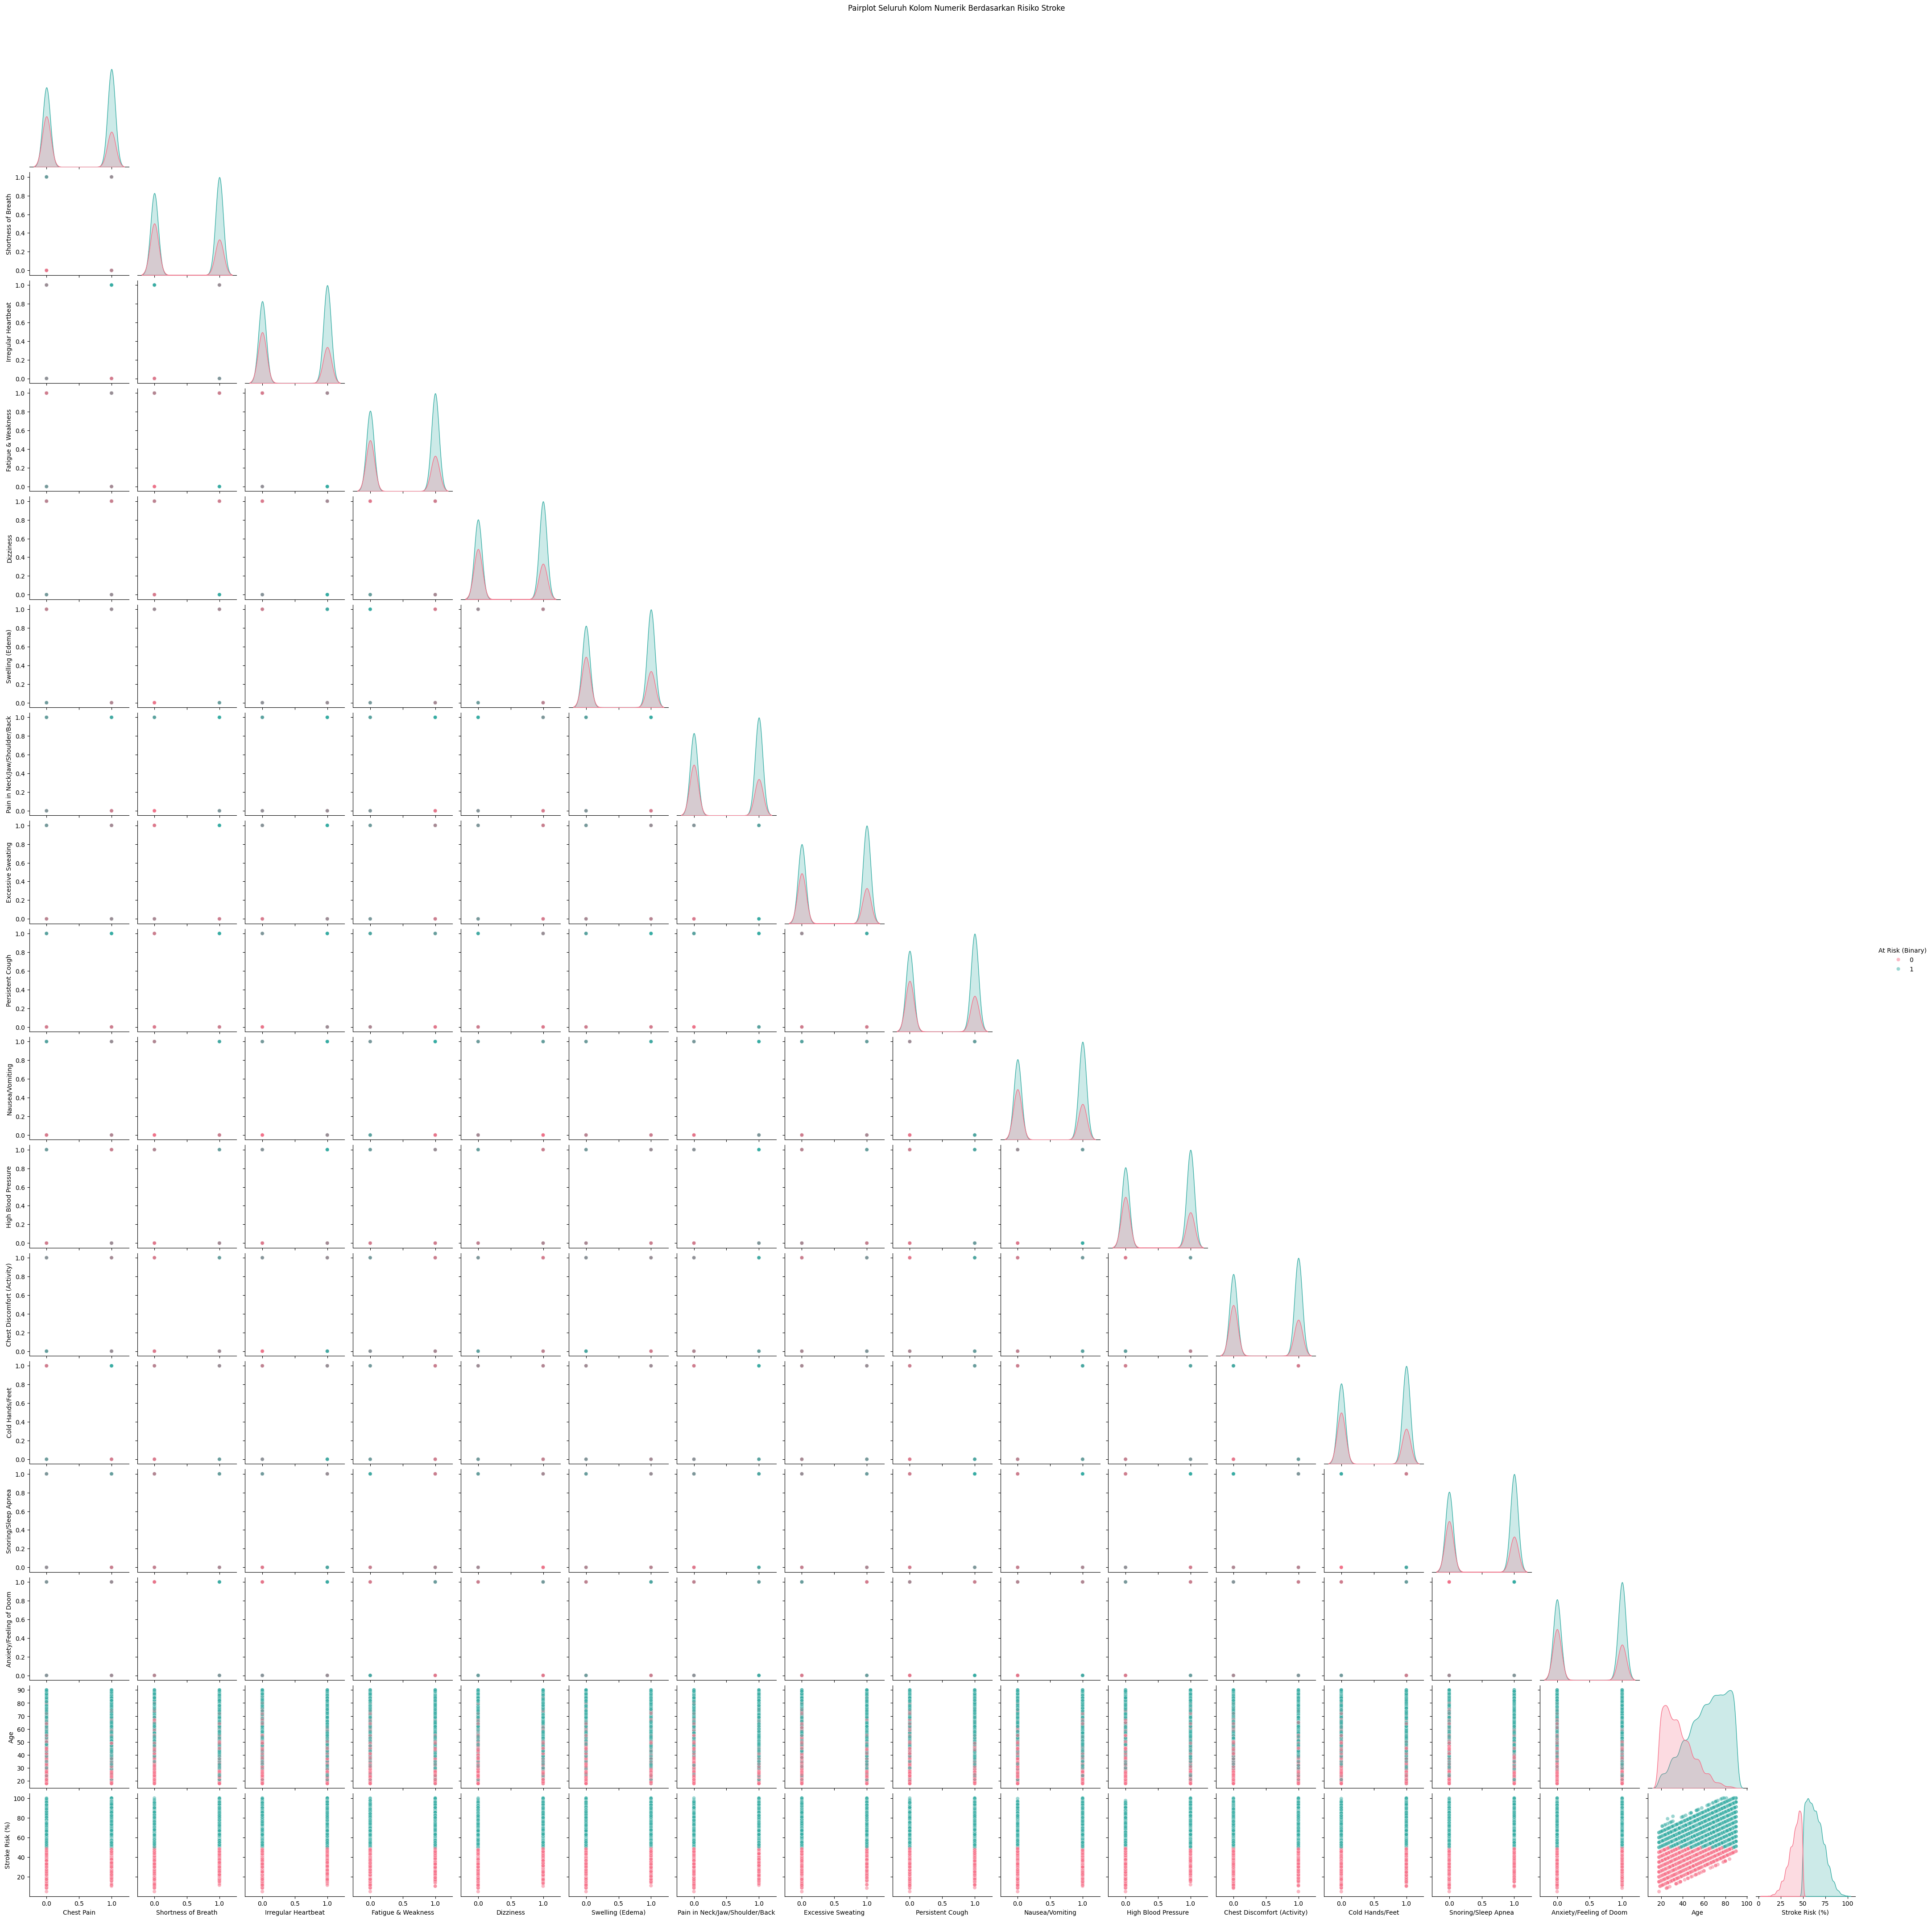

In [ ]:
sns.pairplot(data, hue='At Risk (Binary)', corner=True, palette='husl', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot Seluruh Kolom Numerik Berdasarkan Risiko Stroke', y=1.02)
plt.show()

Pairplot ini digunakan untuk mengeksplorasi hubungan bivariate antar seluruh variabel numerik dalam dataset. Pewarnaan (hue) didasarkan pada variabel target **At Risk (Binary)**, yaitu 1 (berisiko stroke) dan 0 (tidak berisiko stroke).Visualisasi ini menampilkan distribusi setiap variabel pada diagonal, serta hubungan antar variabel pada sel-sel scatterplot.

Temuan utama dari pairplot adalah sebagai berikut:

1. **Distribusi variabel target**
   - Terlihat adanya perbedaan distribusi antara kelompok **At Risk = 1** dan **At Risk = 0** pada variabel **Age** dan **Stroke Risk (%)**, di mana individu berisiko stroke cenderung memiliki usia lebih tinggi dan nilai Stroke Risk (%) lebih besar.
   
2. **Hubungan antar gejala**
   - Variabel gejala memiliki distribusi biner (0 atau 1), sehingga scatterplot antar gejala membentuk pola garis horizontal/vertikal.
   - Tidak terlihat adanya hubungan linear kuat antar variabel gejala satu sama lain.

3. **Pemisahan kelompok**
   - Pairplot menunjukkan bahwa pemisahan visual antar kelompok **At Risk (Binary)** tidak terlalu jelas jika hanya berdasarkan satu atau dua variabel gejala secara individu.
   - Hal ini mengindikasikan perlunya penggunaan algoritma klasifikasi yang mampu memanfaatkan interaksi multivariat dan relasi non-linear antar fitur.

4. **Distribusi diagonal**
   - Plot diagonal memperlihatkan distribusi masing-masing variabel, di mana variabel **Stroke Risk (%)** mendekati distribusi normal, sedangkan variabel gejala menunjukkan distribusi biner.


---

##**Insight Exploratory Data Analysis (EDA)**

1. **Kondisi Dataset**
   - Dataset terdiri dari **70.000 baris dan 18 kolom**.
   - Tidak terdapat **missing value** pada seluruh kolom.
   - Seluruh variabel bertipe numerik (integer atau float), dengan sebagian besar berupa data biner (0/1), kecuali **Age** dan **Stroke Risk (%)**.

2. **Distribusi Variabel**
   - Variabel **Age** memiliki rentang antara **18 hingga 90 tahun**, dengan median sekitar **55 tahun** dan distribusi mendekati simetris.
   - Variabel **Stroke Risk (%)** memiliki rentang **0–100%**, dengan distribusi mendekati normal (bell-shaped), median di sekitar **55%**.
   - Sebagian besar variabel gejala memiliki distribusi dominan pada nilai **0** (tidak mengalami gejala), dengan proporsi lebih besar **nilai 1 (mengalami gejala)** pada kelompok individu berisiko stroke.

3. **Outlier dan Skewness**
   - Tidak terdapat outlier signifikan pada variabel **Age**, namun terdapat outlier pada variabel **Stroke Risk (%)** di rentang nilai ekstrem (di atas 95% atau di bawah 20%).
   - Hampir seluruh variabel memiliki **skewness mendekati nol**, menunjukkan distribusi relatif simetris.

4. **Korelasi Antar Variabel**
   - Korelasi tertinggi terhadap variabel target **At Risk (Binary)** adalah:
     - **Stroke Risk (%)**: korelasi positif sebesar **0,79**.
     - **Age**: korelasi positif sebesar **0,61**.
   - Variabel gejala memiliki korelasi rendah terhadap **At Risk (Binary)** (rata-rata di bawah 0,15) serta korelasi sangat rendah antar gejala satu sama lain.

5. **Distribusi Target**
   - Jumlah individu **berisiko stroke (At Risk = 1)** lebih banyak dibandingkan yang **tidak berisiko (At Risk = 0)**.
   - Proporsi data menunjukkan ketidakseimbangan kelas: sekitar **65% berisiko** dan **35% tidak berisiko**.

6. **Persebaran Gejala**
   - Sebagian besar gejala lebih sering muncul pada kelompok **berisiko stroke**, dengan perbedaan paling mencolok pada:
     - **High Blood Pressure**
     - **Irregular Heartbeat**
     - **Chest Pain**
     - **Pain in Neck/Jaw/Shoulder/Back**
   - Gejala lain juga lebih dominan di kelompok berisiko, tetapi dengan selisih yang lebih kecil.

7. **Visualisasi Multivariat (Pairplot)**
   - Pairplot menunjukkan pemisahan kelas **At Risk (Binary)** yang relatif terlihat pada kombinasi variabel **Age** dan **Stroke Risk (%)**.
   - Tidak terdapat pola pemisahan kelas yang jelas hanya dengan variabel gejala secara individual.
   - Hubungan antar gejala terlihat tumpang tindih, memperkuat pentingnya penggunaan model machine learning yang mampu memanfaatkan interaksi multivariat.

**Kesimpulan**
Struktur data yang bersih, tanpa missing value, dan distribusi data yang relatif seimbang


## Data Preprosessing

In [3]:
Q1 = data['Stroke Risk (%)'].quantile(0.25)
Q3 = data['Stroke Risk (%)'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

data['Stroke Risk (%)'] = np.where(data['Stroke Risk (%)'] < batas_bawah, batas_bawah,
                                   np.where(data['Stroke Risk (%)'] > batas_atas, batas_atas,
                                            data['Stroke Risk (%)']))

* **Handling Outlier** pada Stroke Risk (%), Outlier pada kolom **Stroke Risk (%)** diidentifikasi menggunakan metode Interquartile Range (IQR). Nilai di luar rentang (Q1 - 1.5 * IQR) dan (Q3 + 1.5 * IQR) dianggap sebagai outlier dan akan digantikan dengan nilai batas atas atau bawah.


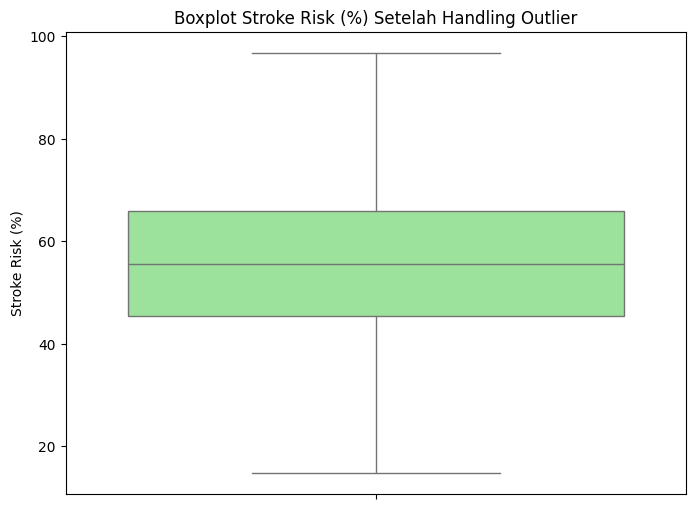

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['Stroke Risk (%)'], color='lightgreen')
plt.title('Boxplot Stroke Risk (%) Setelah Handling Outlier')
plt.ylabel('Stroke Risk (%)')
plt.show()

Visualisasi boxplot ini digunakan untuk menampilkan persebaran nilai **Stroke Risk (%)** setelah dilakukan proses penanganan outlier dengan metode Interquartile Range (IQR).

Hasil boxplot:
- Nilai **Stroke Risk (%)** berada dalam rentang antara **batas bawah IQR (~20%) hingga batas atas IQR (~100%)** setelah proses winsorizing.
- Median **Stroke Risk (%)** berada di sekitar **55%**, menunjukkan bahwa setengah populasi memiliki risiko stroke lebih dari 55%.
- Penyebaran data relatif simetris tanpa adanya outlier yang sebelumnya terdeteksi.

In [5]:
scaler = StandardScaler()
data[['Age', 'Stroke Risk (%)']] = scaler.fit_transform(data[['Age', 'Stroke Risk (%)']])

* Standarisasi Age dan Stroke Risk (%) proses standarisasi dilakukan untuk menyamakan skala variabel numerik **Age** dan **Stroke Risk (%)**, sehingga setiap fitur memiliki distribusi dengan mean 0 dan standar deviasi 1.

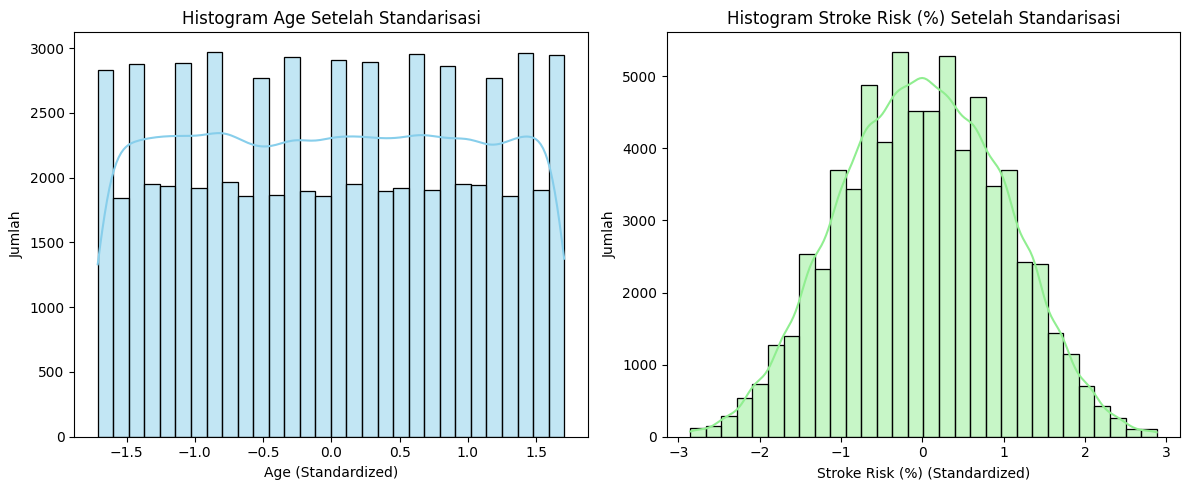

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Histogram Age Setelah Standarisasi')
plt.xlabel('Age (Standardized)')
plt.ylabel('Jumlah')

plt.subplot(1,2,2)
sns.histplot(data['Stroke Risk (%)'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram Stroke Risk (%) Setelah Standarisasi')
plt.xlabel('Stroke Risk (%) (Standardized)')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

Histogram ini menampilkan distribusi variabel **Age** dan **Stroke Risk (%)** setelah dilakukan standarisasi menggunakan StandardScaler.

Hasil:

1. **Age (Standardized)**
   - Distribusi **Age** setelah standarisasi menunjukkan pola yang mendekati seragam (uniform) pada rentang standar deviasi antara -1.5 hingga +1.5.
   - Hal ini sesuai dengan distribusi usia awal yang relatif merata pada data original.

2. **Stroke Risk (%) (Standardized)**
   - Distribusi **Stroke Risk (%)** setelah standarisasi tetap menyerupai distribusi normal (bell-shaped).
   - Mayoritas data berada dalam rentang standar deviasi -2 hingga +2, menunjukkan tidak adanya outlier ekstrem setelah proses penanganan outlier sebelumnya.

In [10]:
X = data.drop('At Risk (Binary)', axis=1)
y = data['At Risk (Binary)']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

* Penyeimbangan Kelas dengan SMOTE, Distribusi awal variabel target **At Risk (Binary)** menunjukkan ketidakseimbangan kelas sekitar 65:35 (lebih banyak individu berisiko stroke). Untuk meningkatkan performa model dalam mendeteksi kedua kelas secara seimbang, dilakukan penyeimbangan kelas menggunakan **SMOTE (Synthetic Minority Oversampling Technique).**


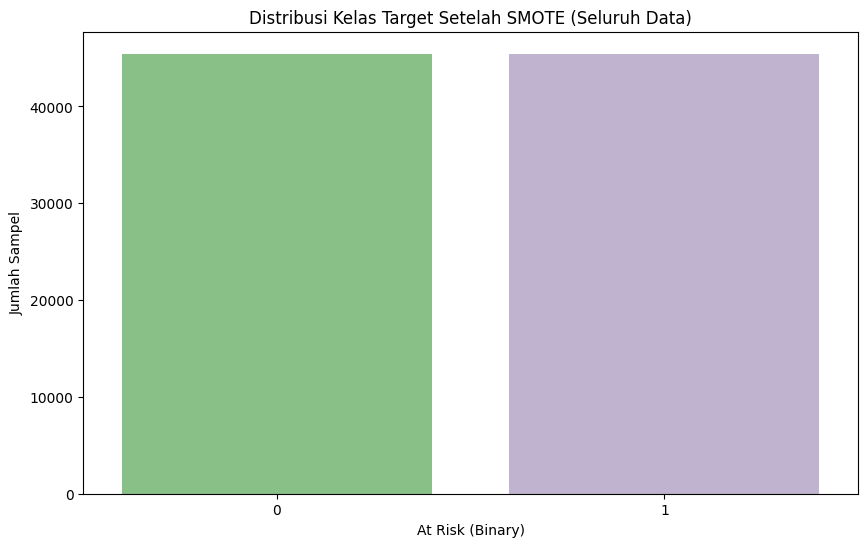

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=y_resampled, hue=y_resampled, palette='Accent', legend=False)
plt.title('Distribusi Kelas Target Setelah SMOTE (Seluruh Data)')
plt.xlabel('At Risk (Binary)')
plt.ylabel('Jumlah Sampel')
plt.show()

Visualisasi ini menunjukkan distribusi target variabel **At Risk (Binary)** setelah dilakukan proses oversampling menggunakan **SMOTE (Synthetic Minority Oversampling Technique)** pada seluruh dataset.

Dari grafik bar chart terlihat bahwa:
- Jumlah sampel pada kelas **0 (tidak berisiko stroke)** dan kelas **1 (berisiko stroke)** telah menjadi **seimbang sempurna.**
- Proses SMOTE berhasil menambah data sintetik pada kelas minoritas (kelas 0) sehingga jumlah kedua kelas setara.
- Penyeimbangan ini penting untuk menghindari bias model terhadap kelas mayoritas.

In [19]:
joblib.dump(scaler, 'scaler_stroke.pkl')

['scaler_stroke.pkl']

* Menyimpan **Scaler (StandardScaler)** dalam format `.pkl`  agar dapat digunakan kembali saat inference atau deployment tanpa perlu fit ulang.

In [20]:
X_resampled['At Risk (Binary)'] = y_resampled
X_resampled.to_csv('stroke_data_preprocessed_smote.csv', index=False)

* Dataset hasil preprocessing disimpan ke dalam file `stroke_data_preprocessed_smote.csv` untuk keperluan eksplorasi atau penggunaan lintas platform. Selain itu, object **StandardScaler** yang digunakan dalam preprocessing juga disimpan dalam file `scaler_stroke.pkl` untuk memastikan konsistensi proses scaling pada data baru (inference atau deployment).
---

## Insight Data Preprocessing

1. **Penanganan Outlier:**
   - Outlier terdeteksi pada variabel **Stroke Risk (%)** melalui analisis boxplot dan IQR.
   - Dilakukan penanganan outlier dengan metode **winsorizing (clipping)**, yaitu memotong nilai ekstrem di bawah Q1 - 1.5 IQR dan di atas Q3 + 1.5 IQR.
   - Hasilnya, distribusi Stroke Risk (%) menjadi lebih stabil dan tidak terdistorsi oleh nilai ekstrem, tanpa kehilangan data.

2. **Standarisasi Fitur Numerik:**
   - Fitur numerik **Age** dan **Stroke Risk (%)** distandarisasi menggunakan **StandardScaler**.
   - Proses standarisasi memusatkan data ke mean = 0 dan std dev = 1, menjadikan distribusi lebih seragam dan mendukung algoritma yang sensitif terhadap skala.
   - Visualisasi histogram setelah standarisasi menunjukkan distribusi telah terstandardisasi dengan baik.

3. **Penyeimbangan Kelas dengan SMOTE:**
   - Distribusi awal target **At Risk (Binary)** menunjukkan ketidakseimbangan (~65% vs 35%).
   - Diterapkan **SMOTE (Synthetic Minority Oversampling Technique)** untuk menyeimbangkan jumlah sampel pada kedua kelas.
   - Hasil distribusi target setelah SMOTE menjadi **seimbang sempurna (50:50)**.
   - Visualisasi bar chart memperlihatkan distribusi kelas 0 dan kelas 1 telah setara.

4. **Penyimpanan Data dan Scaler:**
   - Dataset hasil preprocessing disimpan ke file **stroke_data_preprocessed_smote.csv** untuk kebutuhan reproduksi dan penggunaan lanjutan.
   - Objek scaler disimpan dalam file **scaler_stroke.pkl** untuk memastikan proses scaling konsisten saat inference atau deployment model.

**Kesimpulan:**
Dataset telah diproses secara menyeluruh meliputi penanganan outlier, standarisasi, dan penyeimbangan kelas.  


## Model training

### Split Data

In [31]:
X = X_resampled.drop('At Risk (Binary)', axis=1)
y = y_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

* Split Data Train dan Test, Variabel fitur dan target hasil dari SMOTE  dipisahkan terlebih dahulu. Kolom target **At Risk (Binary)** di-drop dari X, sehingga hanya fitur yang tersisa. Kemudian data dibagi/displit menjadi 80% data train dan 20% data test



### Logistic Regression

In [32]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

* Train data menggunakan Logistic Regression


In [33]:
y_pred_lr = lr_model.predict(X_test)

* Melakukan prediksi terhadap data uji menggunakan model yang telah dilatih.

In [34]:
print("Classification Report Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9089
           1       1.00      1.00      1.00      9089

    accuracy                           1.00     18178
   macro avg       1.00      1.00      1.00     18178
weighted avg       1.00      1.00      1.00     18178



* Menampilkan hasil evaluasi model **Logistic Regression** dalam bentuk classification report.

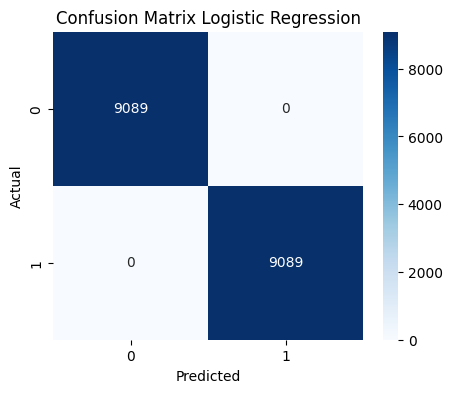

In [36]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Visualisasi confusion matrix hasil prediksi **Logistic Regression** dalam bentuk heatmap untuk mempermudah interpretasi.

In [37]:
joblib.dump(lr_model, 'model_logistic_regression.pkl')

['model_logistic_regression.pkl']

* Menyimpan model **Logistic Regression** ke file pickle untuk keperluan inference atau deployment.
---

### Insight Evaluasi Model Logistic Regression

1. **Performance Metrics:**
   - **Accuracy:** 1.00 (100%)
   - **Precision:** 1.00
   - **Recall:** 1.00
   - **F1-Score:** 1.00
   - Semua metrik menunjukkan nilai **sempurna (1.00)** pada kedua kelas (0 dan 1).

2. **Confusion Matrix:**
   - Model berhasil memprediksi **seluruh data uji secara benar tanpa kesalahan.**
   - Nilai **True Positive (TP) = 9089** dan **True Negative (TN) = 9089**, sedangkan **False Positive (FP) = 0** dan **False Negative (FN) = 0**.
   - Visualisasi confusion matrix menunjukkan distribusi prediksi **100% tepat di diagonal utama.**

3. **Interpretasi:**
   - Model **tidak melakukan kesalahan klasifikasi sama sekali** pada data uji.
   - Hasil ini menunjukkan bahwa model mampu **memisahkan kedua kelas dengan sempurna** pada data uji.

### Random Forest

In [38]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

* Training data menggunakan algoritma Random Forest

In [39]:
y_pred_rf = rf_model.predict(X_test)

* Melakukan prediksi terhadap data uji menggunakan model yang telah dilatih.

In [40]:
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9089
           1       1.00      1.00      1.00      9089

    accuracy                           1.00     18178
   macro avg       1.00      1.00      1.00     18178
weighted avg       1.00      1.00      1.00     18178



* Menampilkan hasil evaluasi model **Random Forest** dalam bentuk classification report.

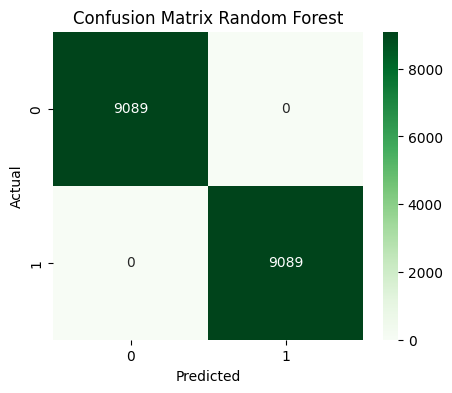

In [41]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Visualisasi confusion matrix hasil prediksi **Random Forest** dalam bentuk heatmap untuk mempermudah interpretasi.


In [47]:
joblib.dump(rf_model, 'model_random_forest.pkl')

['model_random_forest.pkl']

* Menyimpan model **Random Forest** ke file pickle untuk keperluan inference atau deployment.
---

###Insight Evaluasi Model Random Forest

1. **Performance Metrics:**
   - **Accuracy:** 1.00 (100%)
   - **Precision:** 1.00
   - **Recall:** 1.00
   - **F1-Score:** 1.00
   - Seluruh metrik menunjukkan nilai **sempurna (1.00)** pada kedua kelas (0 dan 1).

2. **Confusion Matrix:**
   - Model berhasil memprediksi **seluruh sampel dengan benar tanpa error.**
   - Nilai **True Positive (TP) = 9089** dan **True Negative (TN) = 9089**.
   - **False Positive (FP) = 0** dan **False Negative (FN) = 0**.
   - Visualisasi heatmap menunjukkan hasil prediksi sempurna di diagonal utama.

3. **Interpretasi:**
   - Model **Random Forest** mampu membedakan kelas dengan sangat baik pada data uji, tanpa kesalahan klasifikasi.
   - Hasil sempurna ini menunjukkan **fit yang sangat baik pada data uji hasil SMOTE.**



### SVM

In [43]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

* Training data menggunakan algoritma SVM **Support Vector Machine (SVM)**

In [44]:
y_pred_svm = svm_model.predict(X_test)

* Melakukan prediksi terhadap data uji menggunakan model yang telah dilatih.

In [45]:
print("Classification Report SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9089
           1       1.00      1.00      1.00      9089

    accuracy                           1.00     18178
   macro avg       1.00      1.00      1.00     18178
weighted avg       1.00      1.00      1.00     18178



* Menampilkan hasil evaluasi model **SVM** dalam bentuk classification report.

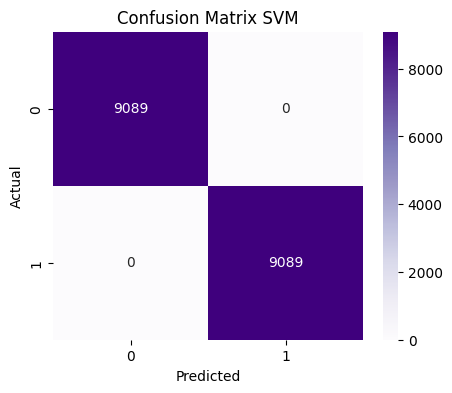

In [46]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Visualisasi confusion matrix hasil prediksi **SVM** dalam bentuk heatmap untuk mempermudah interpretasi.


In [48]:
joblib.dump(svm_model, 'model_svm.pkl')

['model_svm.pkl']

* Menyimpan model **SVM** ke file pickle untuk keperluan inference atau deployment.
---

### Insight Evaluasi Model Support Vector Machine (SVM)

1. **Performance Metrics:**
   - **Accuracy:** 1.00 (100%)
   - **Precision:** 1.00
   - **Recall:** 1.00
   - **F1-Score:** 1.00
   - Semua metrik menunjukkan nilai **sempurna (1.00)** pada kedua kelas (0 dan 1).

2. **Confusion Matrix:**
   - Model berhasil memprediksi **seluruh sampel dengan benar tanpa kesalahan.**
   - Nilai **True Positive (TP) = 9089** dan **True Negative (TN) = 9089.**
   - Tidak terdapat **False Positive (FP)** maupun **False Negative (FN).**
   - Heatmap confusion matrix menunjukkan prediksi sempurna di diagonal utama.

3. **Interpretasi:**
   - Model **SVM** memiliki **kemampuan pemisahan kelas yang sangat baik** pada data uji.
---

## Perbandingan Performa Model
**Logistic Regression, Random Forest, dan Support Vector Machine**

## Hasil Evaluasi

| Model                  | Accuracy | Precision | Recall | F1-Score |
|-----------------------|----------|-----------|--------|----------|
| Logistic Regression    | 1.00     | 1.00      | 1.00   | 1.00     |
| Random Forest          | 1.00     | 1.00      | 1.00   | 1.00     |
| Support Vector Machine | 1.00     | 1.00      | 1.00   | 1.00     |

Seluruh algoritma menunjukkan nilai **100% (1.00)** pada seluruh metrik evaluasi, baik pada kelas 0 (tidak berisiko) maupun kelas 1 (berisiko).

## Analisis Confusion Matrix

- Tidak terdapat kesalahan klasifikasi pada seluruh model.
- **True Positive (TP) = 9089** dan **True Negative (TN) = 9089** untuk setiap model.
- **False Positive (FP) = 0** dan **False Negative (FN) = 0** pada seluruh model.
- Visualisasi confusion matrix menunjukkan seluruh prediksi berada di diagonal utama, mengindikasikan klasifikasi sempurna.

## Interpretasi Performa Model

1. **Logistic Regression**
   - Model linear yang sangat efektif memisahkan kelas pada dataset ini.
   - Hasil sempurna menunjukkan bahwa hubungan antara fitur dan target cukup linear atau dataset bersifat mudah dipisahkan.
   - Memiliki interpretabilitas tinggi dan kecepatan training relatif cepat.

2. **Random Forest**
   - Algoritma berbasis ensembel pohon keputusan yang kuat dalam mengatasi data non-linear dan interaksi antar fitur.
   - Performanya yang sempurna menunjukkan kekuatan model dalam menangkap pola data bahkan tanpa parameter tuning tambahan.
   - Lebih kompleks daripada Logistic Regression, tetapi tetap mampu memberikan akurasi optimal.

3. **Support Vector Machine**
   - Model berbasis hyperplane dengan kernel linear (pada konfigurasi ini).
   - Mampu menghasilkan decision boundary optimal, terbukti dengan prediksi sempurna.
   - Waktu training relatif lebih lama dibanding Logistic Regression, tetapi interpretasi lebih sulit dibanding model linear.

## Rekomendasi Evaluasi Tambahan

1. **Evaluasi pada data tanpa SMOTE** → untuk mengetahui performa model terhadap distribusi kelas asli.
2. **Cross-validation k-fold** → memastikan kestabilan performa model terhadap subset data yang berbeda.
3. **Uji pada data real-world/unseen** → untuk memvalidasi kemampuan generalisasi model pada data operasional.

## Pertimbangan Pemilihan Model

Karena seluruh model menunjukkan performa setara (seluruh metrik = 1.00), pemilihan model dapat mempertimbangkan faktor non-metrik seperti:

- **Kecepatan training** → Logistic Regression lebih cepat.
- **Interpretabilitas** → Logistic Regression paling mudah diinterpretasikan.
- **Robustness terhadap noise** → Random Forest lebih kuat jika data lebih kompleks.
- **Kebutuhan margin optimal** → SVM dapat digunakan jika fokus pada data dengan margin ketat.



## Prediksi Menggunakan Data Baru Dengan Model Logistic Regression

In [49]:
loaded_lr_model = joblib.load('model_logistic_regression.pkl')

* Memuat model Logistic Regression yang telah disimpan sebelumnya dari file pickle

In [57]:
new_data = np.array([[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 80, 55]])

* Menyiapkan satu data input baru dalam format array numpy.  
Data ini harus memiliki jumlah fitur yang sama dengan data training.

In [58]:
data_no_scale = new_data[:, :-2]
data_to_scale = new_data[:, -2:]
data_scaled = scaler.transform(data_to_scale)
new_data_final = np.concatenate([data_no_scale, data_scaled], axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


* Scaler Kolom Numerikal

In [59]:
prediction = loaded_lr_model.predict(new_data_final)
if prediction[0] == 1:
    print("Individu diprediksi BERISIKO Stroke.")
else:
    print("Individu diprediksi TIDAK BERISIKO Stroke.")

Individu diprediksi BERISIKO Stroke.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


* Model **Logistic Regression** memprediksi data input baru yang menghasilkan Output **Individu diprediksi BERISIKO Stroke (label = 1).**